Use this cell for all your imports

In [18]:
import numpy as np
from scipy.sparse import csr_matrix
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.sparse as sparse

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [49]:
# Open file 'data.txt' for reading
with open('data.txt', 'r') as data_file:
    # Skip the first three lines
    for _ in range(3):
        next(data_file)
    
    # Read the data and convert to a list of integer tuples
    data_list = []
    for line in data_file:
        if not line.startswith('#'):
            from_node, to_node = map(int, line.strip().split())
            data_list.append((from_node, to_node))


In [50]:
data

[(1001, 9304045),
 (1001, 9308122),
 (1001, 9309097),
 (1001, 9311042),
 (1001, 9401139),
 (1001, 9404151),
 (1001, 9407087),
 (1001, 9408099),
 (1001, 9501030),
 (1001, 9503124),
 (1001, 9504090),
 (1001, 9504145),
 (1001, 9505025),
 (1001, 9505054),
 (1001, 9505105),
 (1001, 9505162),
 (1001, 9506048),
 (1001, 9506112),
 (1001, 9506144),
 (1001, 9507050),
 (1001, 9507158),
 (1001, 9508094),
 (1001, 9508155),
 (1001, 9510142),
 (1001, 9510225),
 (1001, 9510234),
 (1001, 9511030),
 (1001, 9511171),
 (1001, 9601108),
 (1001, 9602022),
 (1001, 9602114),
 (1001, 9603003),
 (1001, 9603150),
 (1001, 9603161),
 (1001, 9603167),
 (1001, 9605184),
 (1001, 9605222),
 (1001, 9606017),
 (1001, 9606040),
 (1001, 9607163),
 (1001, 9607207),
 (1001, 9608086),
 (1001, 9609070),
 (1001, 9609071),
 (1001, 9609239),
 (1001, 9611137),
 (1001, 9612108),
 (1001, 9701162),
 (1001, 9702094),
 (1001, 9702155),
 (1001, 9702198),
 (1001, 9703082),
 (1001, 9703166),
 (1001, 9704097),
 (1001, 9705030),
 (1001, 97

Use this cell to normalize the matrix as you see fit.

In [57]:
# Convert the data list to a numpy array
data_array = np.array(data)

# Normalize the values in the array using min-max scaling
min_value = np.min(data_array)
max_value = np.max(data_array)
data_norm = (data_array - min_value) / (max_value - min_value)


In [58]:
data_norm

array([[0.        , 0.93863081],
       [0.        , 0.93904216],
       [0.        , 0.93914053],
       ...,
       [0.99999929, 0.98949148],
       [0.99999929, 0.98968601],
       [0.99999929, 0.99886291]])

Apply the PageRank algorithm to the matrix you created.

In [59]:
# Extract edges from the data and create a directed graph
edges = [(pair[0], pair[1]) for pair in data]
graph = nx.DiGraph()
graph.add_edges_from(edges)

# Compute the Pagerank scores for the nodes in the graph
pagerank_scores = nx.pagerank(graph)

# Get the top 5 nodes based on their scores and print them
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]
for node, score in top_nodes:
    print(f"Node: {node}, Score: {score:.4f}")


Node: 9407087, Score: 0.0062
Node: 9503124, Score: 0.0046
Node: 9510017, Score: 0.0044
Node: 9402044, Score: 0.0039
Node: 9711200, Score: 0.0034


Output a list of the 100 most important papers along with their importance

In [70]:
# Compute the Pagerank scores for the nodes in the graph
pagerank_scores = nx.pagerank(graph)

# Sort the nodes based on their scores in descending order
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 100 nodes along with their scores
for node, score in sorted_nodes[:100]:
    print(f"Paper ID: {node}\tImportance Score: {score}")

Paper ID: 9407087	Importance Score: 0.006238910935211853
Paper ID: 9503124	Importance Score: 0.004632588508880592
Paper ID: 9510017	Importance Score: 0.00438516933679889
Paper ID: 9402044	Importance Score: 0.00393534733441006
Paper ID: 9711200	Importance Score: 0.003409682539237114
Paper ID: 9410167	Importance Score: 0.003407370515336668
Paper ID: 9408099	Importance Score: 0.0031898690485387365
Paper ID: 9207016	Importance Score: 0.003113861363851895
Paper ID: 9402002	Importance Score: 0.002962458707729361
Paper ID: 9610043	Importance Score: 0.0027529030118643707
Paper ID: 9205068	Importance Score: 0.0026620045653103336
Paper ID: 9510135	Importance Score: 0.0025914346362725252
Paper ID: 9201015	Importance Score: 0.0025543499779128705
Paper ID: 9205027	Importance Score: 0.0024590344235207264
Paper ID: 9304154	Importance Score: 0.002332519070232545
Paper ID: 9802150	Importance Score: 0.002255515474336817
Paper ID: 9401139	Importance Score: 0.0022459538984583504
Paper ID: 9504090	Importan

Visualize your results

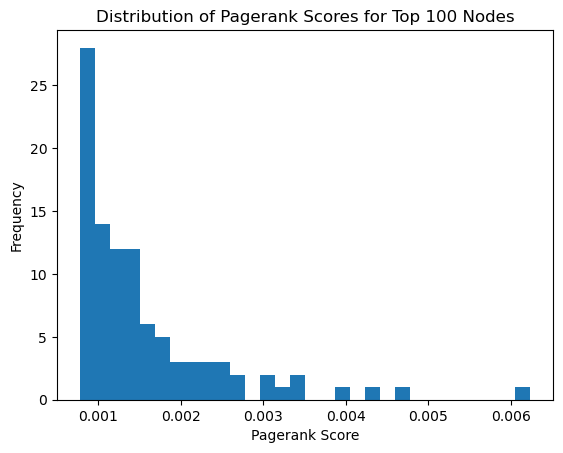

In [72]:
# Extract the top 100 scores from the sorted list of nodes
top_scores = [score for paper, score in sorted_scores[:100]]

# Plot a histogram of the top scores
plt.hist(top_scores, bins=30)
plt.xlabel('Pagerank Score')
plt.ylabel('Frequency')
plt.title('Distribution of Pagerank Scores for Top 100 Nodes')
plt.show()
